In [ ]:
## Enviroment Setup
import os, sys
WORKING_DIR = '/home/dipcik/avatar/flame-head-tracker-temiz'
os.chdir(WORKING_DIR) # change the working directory to the project's absolute path
print("Current Working Directory: ", os.getcwd())

## Computing Device
device = 'cuda:0'
import torch
torch.cuda.set_device(device) # this will solve the problem that OpenGL not on the same device with torch tensors

import matplotlib.pyplot as plt
import numpy as np

from tracker_base import Tracker

def plot(ret_dict, i=0):
    # plot some results
    plt.figure(figsize=(15,6))
    plt.subplot(1,5,1); plt.imshow(ret_dict['img'][i]); plt.title('img'); plt.axis('off')
    plt.subplot(1,5,2); plt.imshow(ret_dict['parsing'][i]); plt.title('parsing'); plt.axis('off')
    plt.subplot(1,5,3); plt.imshow(ret_dict['img_rendered'][i]); plt.title('img_rendered'); plt.axis('off')
    plt.subplot(1,5,4); plt.imshow(ret_dict['shape_rendered'][i]); plt.title('shape_rendered'); plt.axis('off')
    if 'mesh_rendered' in ret_dict:
        plt.subplot(1,5,5); plt.imshow(ret_dict['mesh_rendered'][i]); plt.title('mesh_rendered'); plt.axis('off')
    plt.show()


###########################
## Setup Flame Tracker    #     
###########################

tracker_cfg = {
    'mediapipe_face_landmarker_v2_path': './models/face_landmarker_v2_with_blendshapes.task', 
    'flame_model_path': './models/FLAME2020/generic_model.pkl',
    'flame_lmk_embedding_path': './models/landmark_embedding.npy',
    'ear_landmarker_path': './models/ear_landmarker.pth', # this is optional, if you do not want to use ear landmarks during fitting, just remove this line
    'tex_space_path': './models/FLAME_albedo_from_BFM.npz',
    'face_parsing_model_path': './models/79999_iter.pth',
    'template_mesh_file_path': './models/head_template.obj',
    'result_img_size': 512,
    'use_matting': True,           # use image/video matting to remove background
    'optimize_fov': True,          # whether to optimize the camera FOV, NOTE: this feature is still experimental
    'device': device,
}

tracker = Tracker(tracker_cfg)

# optional settings
tracker.update_init_fov(fov=20)    # this is the initial camera FOV, default is 20
tracker.set_landmark_detector('mediapipe')


Current Working Directory:  /home/dipcik/avatar/flame-head-tracker


2025-09-17 22:48:45.558966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


I0000 00:00:1758138528.327508 2305967 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758138528.394597 2306077 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.05), renderer: NVIDIA GeForce RTX 3060/PCIe/SSE2
W0000 00:00:1758138528.401939 2305967 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1758138528.411705 2306079 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758138528.427330 2306083 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Using cache found in /home/dipcik/.cache/torch/hub/PeterL1n_RobustVideoMatting_master


creating the FLAME Decoder


/home/dipcik/avatar/flame-head-tracker/submodules/flame_lib/FLAME.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_faces_idx', torch.tensor(lmk_embeddings['dynamic_lmk_faces_idx'], dtype=torch.long))
/home/dipcik/avatar/flame-head-tracker/submodules/flame_lib/FLAME.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_bary_coords', torch.tensor(lmk_embeddings['dynamic_lmk_bary_coords'], dtype=self.dtype))
/home/dipcik/miniconda3/envs/tracker/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:551: UserWarning: Mtl file does not exist: ./models/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/home/dipcik/

creating the FLAME Decoder
trained model found. load models/deca_model.tar


/home/dipcik/miniconda3/envs/tracker/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:551: UserWarning: Mtl file does not exist: models/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")



>>> Flame Head Tracker v4.1 ready.


### Demo 1: Landmark-based Fitting



In [2]:
img_path = './assets/FFHQ/00002.png'

# if realign == True, 
# img will be replaced by the realigned image
ret_dict = tracker.load_image_and_run(img_path, realign=True, photometric_fitting=False) 



W0000 00:00:1758138542.091488 2306091 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


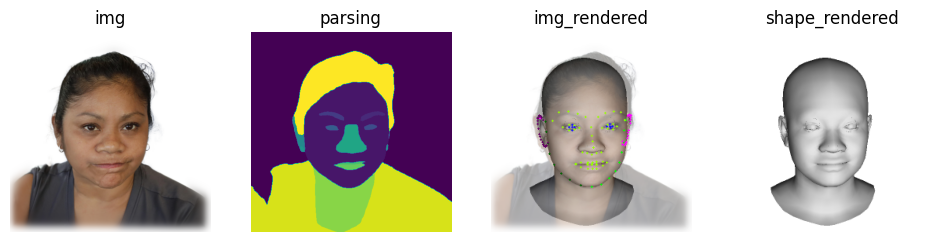

shape (1, 300)
exp (1, 100)
head_pose (1, 3)
jaw_pose (1, 3)
eye_pose (1, 6)
tex (1, 50)
light (1, 9, 3)
cam (1, 6)
FOV =  [23.026121]
K (1, 3, 3)
img_rendered (1, 256, 256, 3)
shape_rendered (1, 256, 256, 3)
img (1, 512, 512, 3)
img_aligned (1, 512, 512, 3)
parsing (1, 512, 512)
parsing_aligned (1, 512, 512)
lmks_68 (1, 68, 2)
lmks_ears (1, 20, 2)
lmks_eyes (1, 10, 2)
blendshape_scores (1, 52)


In [3]:
plot(ret_dict)

# check the shapes of returned results
for key in ret_dict:
    if key == 'fov': print('FOV = ', ret_dict[key])
    else: print(f'{key} {ret_dict[key].shape}')

### Demo 2: Photometric Fitting

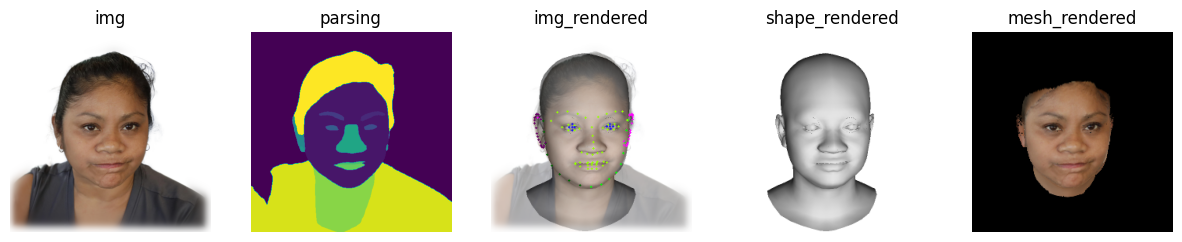

FOV =  [23.026121]


In [4]:
img_path = './assets/FFHQ/00002.png'

ret_dict = tracker.load_image_and_run(img_path, realign=True, photometric_fitting=True)
plot(ret_dict)

print('FOV = ', ret_dict['fov'])


### More Results (batch fitting)

FOV = 20.895727157592773
Camera:  [ 0.0251  0.0101 -0.0107  0.0201  0.0047  0.7838]


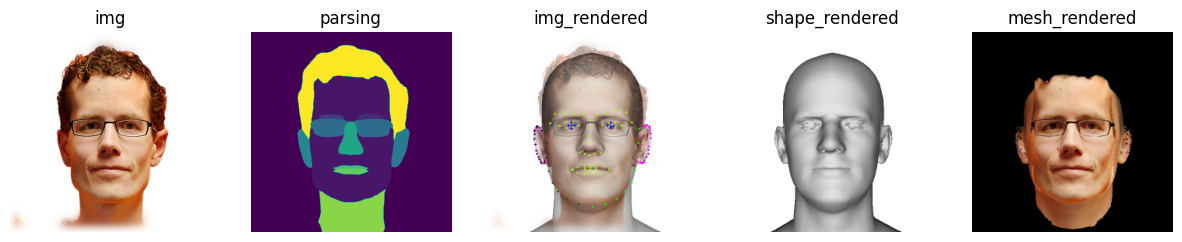

FOV = 22.939130783081055
Camera:  [ 0.2456 -0.2383 -0.0024  0.1704  0.1825  0.7058]


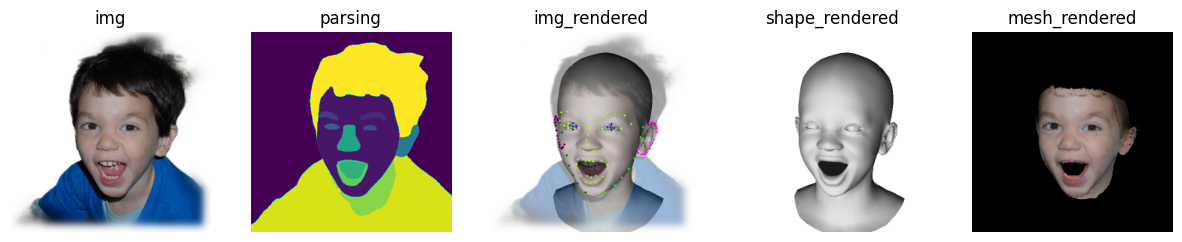

FOV = 24.837806701660156
Camera:  [-0.3812 -0.277   0.0922 -0.2721  0.1842  0.6757]


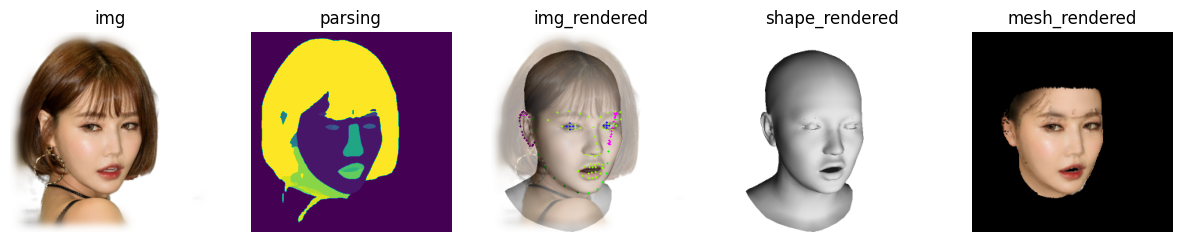

FOV = 21.9532413482666
Camera:  [ 0.0747 -0.1339 -0.0039  0.0618  0.1235  0.8421]


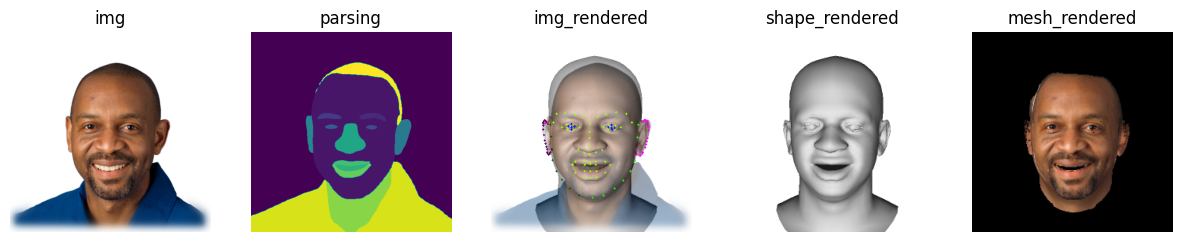

FOV = 23.7125186920166
Camera:  [ 0.0265 -0.0524 -0.0007  0.021   0.0531  0.7904]


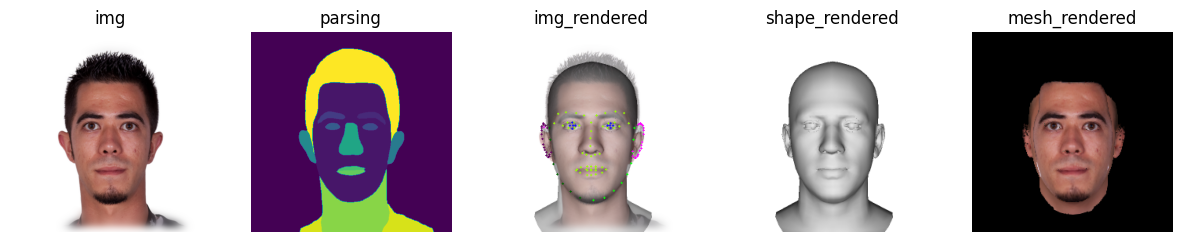

FOV = 22.378263473510742
Camera:  [-0.1212 -0.2169  0.0221 -0.0997  0.1863  0.8261]


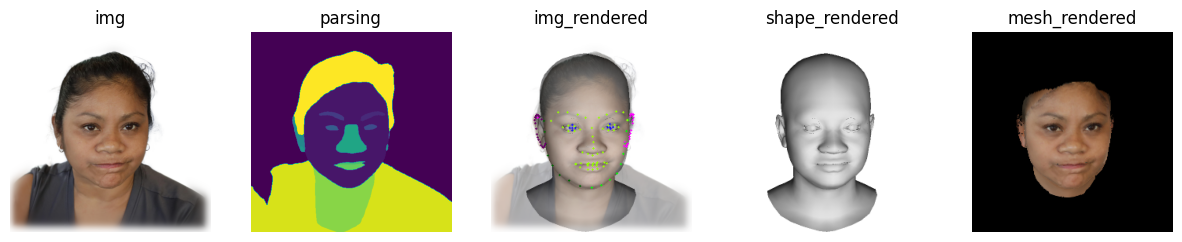

FOV = 22.32856559753418
Camera:  [-0.0384  0.0303 -0.0126 -0.0287 -0.01    0.7908]


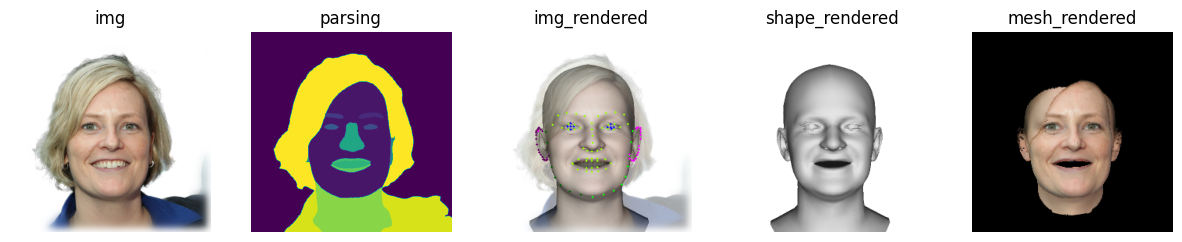

FOV = 23.551074981689453
Camera:  [0.0513 0.0029 0.0032 0.034  0.0103 0.6884]


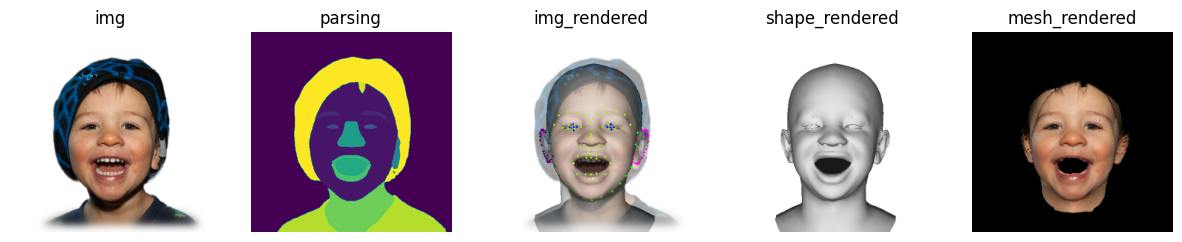

FOV = 23.48162841796875
Camera:  [-0.3084  0.1035 -0.0665 -0.2238 -0.0462  0.7233]


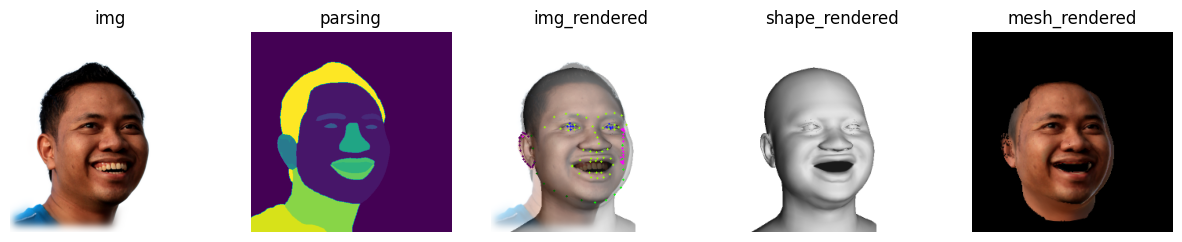

FOV = 23.255516052246094
Camera:  [ 0.0877 -0.1987 -0.0082  0.0616  0.148   0.6982]


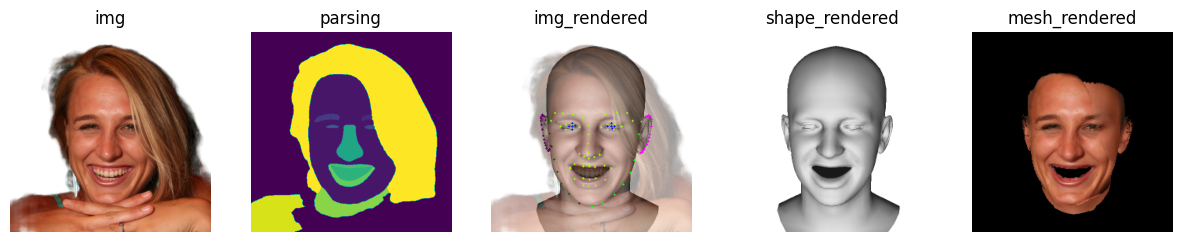

FOV = 22.408071517944336
Camera:  [-0.3069 -0.123   0.0701 -0.2212  0.0834  0.7134]


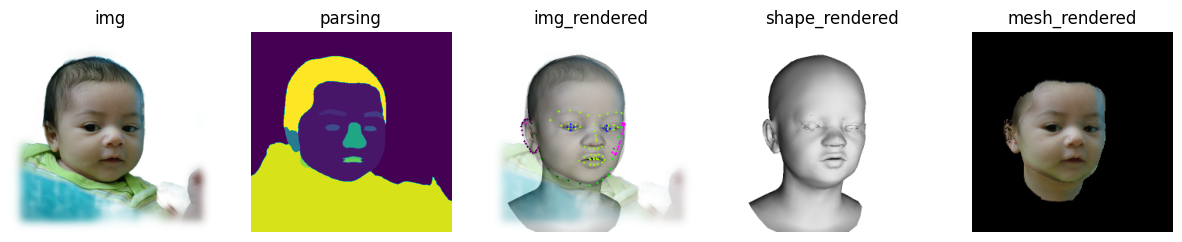

In [6]:
img_paths = [os.path.join('./assets/FFHQ/', f) for f in os.listdir('./assets/FFHQ/') if f.endswith('.png') and f.startswith('.') is False]

ret_dict, valid_indices = tracker.load_batch_images_and_run(img_paths, realign=True, photometric_fitting=True)

for i, idx in enumerate(valid_indices):
    img_path = img_paths[idx]
    print('FOV = {}'.format(ret_dict['fov'][i]))
    np.set_printoptions(suppress=True, precision=4)
    print('Camera: ', ret_dict['cam'][i])
    plot(ret_dict, i)

